# Pitzer Calcs #1: 1973a

    

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
#define functions
def I_binary(molality):
    return 0.5*(molality*(1)**2+molality*(1)**2)

def B_phi(beta_0,beta_1,alpha,I):
    return beta_0+beta_1*(np.exp(-1*alpha*math.sqrt(I)))

def thetaandphi(solvent_B_phi,solute_B_phi,solvent_C_phi,solute_C_phi,molality):
    return solvent_B_phi - solute_B_phi + (molality * (solvent_C_phi - solute_C_phi))
       

In [3]:
mol_range=np.arange(0,4,0.5)
alpha=2.00
I=I_binary(mol_range)

In [4]:
print(I)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5]


In [5]:
#data in structure [beta_0,beta_1,C_phi] from Pitzer 1973b
data_HCl=[.1775,.2945,.00080]
data_LiCl=[.1494,.3074,.00359]
data_NaCl=[.0765,.2664,.00127]
data_KCl=[.04835,.2122,-.00084]
#data_CsCl=[.0300,.0558,.00038]
data_CsCl=[.03449,.01336,-.00049]

In [6]:
B_phi_HCl=[]
B_phi_LiCl=[]
B_phi_NaCl=[]
B_phi_KCl=[]
B_phi_CsCl=[]

In [7]:
#create the array of B_phi for HCl
#yes, I know this is hideous
#and on the bright side I learned that arrays start at zero
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[0]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[1]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[2]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[3]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[4]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[5]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[6]))
B_phi_HCl.append(B_phi(data_HCl[0],data_HCl[1],alpha,I[7]))




In [8]:
print(B_phi_HCl)

[0.47199999999999998, 0.24909787829087607, 0.21735624091318242, 0.20292643193497661, 0.19490664236249611, 0.18996595517903386, 0.18671817785063272, 0.18448399858769843]


In [9]:
#in which I demonstrate the magic of for loops
#this took me a little TOO long to figure out
for i in range(0,8):
    B_phi_LiCl.append(B_phi(data_LiCl[0],data_LiCl[1],alpha,I[i]))
    B_phi_NaCl.append(B_phi(data_NaCl[0],data_NaCl[1],alpha,I[i]))
    B_phi_KCl.append(B_phi(data_KCl[0],data_KCl[1],alpha,I[i]))
    B_phi_CsCl.append(B_phi(data_CsCl[0],data_CsCl[1],alpha,I[i]))

In [10]:
print(B_phi_LiCl)

[0.45679999999999998, 0.22413408416507746, 0.19100206606693476, 0.17594018735759531, 0.16756910649314535, 0.16241200211217321, 0.15902196221149237, 0.15668991906912905]


In [11]:
LiCl_output=[]
NaCl_output=[]
KCl_output=[]
CsCl_output=[]

In [12]:
for i in range(0,8):
    LiCl_output.append(thetaandphi(B_phi_HCl[i],B_phi_LiCl[i],data_HCl[2],data_LiCl[2],I[i]))
    NaCl_output.append(thetaandphi(B_phi_HCl[i],B_phi_NaCl[i],data_HCl[2],data_NaCl[2],I[i]))
    KCl_output.append(thetaandphi(B_phi_HCl[i],B_phi_KCl[i],data_HCl[2],data_KCl[2],I[i]))
    CsCl_output.append(thetaandphi(B_phi_HCl[i],B_phi_CsCl[i],data_HCl[2],data_CsCl[2],I[i]))

In [13]:
print(I)
print(LiCl_output)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5]
[0.015199999999999991, 0.023568794125798605, 0.023564174846247662, 0.022801244577381301, 0.021757535869350753, 0.020578953066860646, 0.019326215639140349, 0.018029079518569382]


<IPython.core.display.Javascript object>


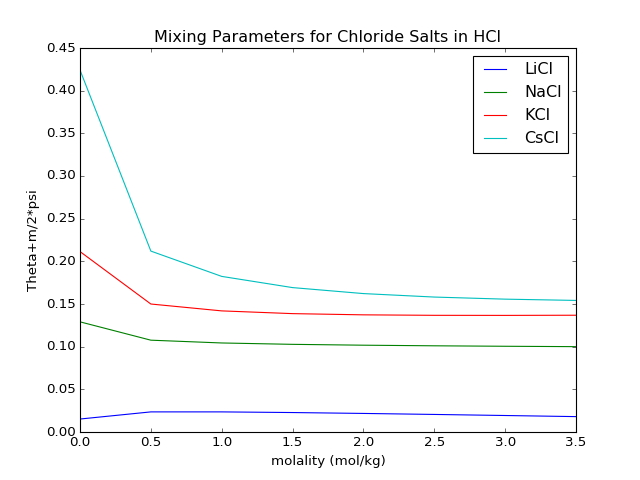

In [16]:
#this graphs the data
%matplotlib notebook
import numpy
import matplotlib
import matplotlib.pyplot as plt

plt.xlabel('molality (mol/kg)')
plt.ylabel('Theta+m/2*psi')
plt.title('Mixing Parameters for Chloride Salts in HCl')
plt.plot(I,LiCl_output,label="LiCl")
plt.plot(I,NaCl_output,label="NaCl")
plt.plot(I,KCl_output,label="KCl")
plt.plot(I,CsCl_output,label="CsCl")
plt.legend(loc=1)
plt.show()

# This graph is not correct